(sec:buffons_needle)=
# Example: Buffon's Needle #

The goal of this section is to give a tour of concepts related to
simulation and modeling. And what better way to start that than with
[Buffon's needle](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem)?


__Description:__ The experiment has a table made of parallel strips of wood all of the same width $d$. One also has a needle of length $\ell < d$. The needle is tossed onto the table, and we record whether the needle crosses two strips after it has come to rest. This is illustrated in Figure {ref}`df`. We repeat this $n$ times and for instance $k$ we record the outcome as $x_k$. The result is a sample $\{x_1, x_2, \ldots, x_n\}$. The original goal was to estimate the probability $p$ that the needle crosses strips. As we will see, this experiment can also be used to estimate $\pi$.

__Modeling:__ How can we capture the above system $S$ as a precise mathematical model? We can start by introducing a coordinate system on the table as shown in the figure. For a needle toss, we let $x$ denote the distance from the leftmost endpoint $P$ of the needle to the nearest left-edge of the wood strip containing $P$. Next, we let $\theta$ denote the angle that the needle forms with the $x$-axis at $P$.

It seems quite reasonable to model $x$ as a random variable $X$ having __uniform distribution__ $U(0,d)$. Similarly, $\theta$ can be represented by a random variable $\Theta \sim U(-\frac{\pi}{2}, \frac{\pi}{2})$. We will assume that $X$ and $\Theta$ are __independent__. When does the needle intersect two strips? This happens precisely when

::::{math}
\begin{equation}
x + \ell \cos\theta > d \;.
\end{equation}
::::

How do we turn this into something that we can use to estimate the probability $p$ of intersection? A common approach is to introduce an indicator random variable, a random variable that can only assume two values, 0 and 1. Here the random variable $\mathbb{I}(X,\Theta)$  is defined by 

::::{math}
:label: eq:buffon_indicator
\begin{equation}
\mathbb{I}(x,\theta) = 
\begin{cases}
1,& x > d - \ell\cos\theta \\
0,& \text{otherwise.}
\end{cases}
\end{equation}
::::

The __joint probability density function__ of $X$ and $\Theta$ is $f(x,\theta) = \frac{1}{\pi d}$. What is the expected value of $\mathbb{I}$? 

::::{math}

\begin{align}
E(\mathbb{I}) 
 &= \int_{-\pi/2}^{\pi/2} \int_0^d \mathbb{I}(x,\theta) f(x,\theta)\, dx\, d\theta \\
 &= \int_{-\pi/2}^{\pi/2} \int_{d-\ell\cos\theta}^d \frac{1}{\pi d} \, dx\, d\theta  \\
 &= \frac{1}{d\pi} \int_{-\pi/2}^{\pi/2} \ell\cos\theta \, d\theta \\
 &= \frac{2\ell}{\pi d} \;.
 \end{align}
::::

For an indicator random variable, it is an elementary fact that $E(\mathbb{I}) = \Pr(\mathbb{I} = 1)$, and we conclude that 
::::{math}
p = \frac{2\ell}{d\pi}\;.
::::

Let $X_k$ denote the indicator random variable capturing the $k^{\text{th}}$ needle toss. The sequence of random variables $X_1$ through $X_n$ are independent, and by the __strong law of large numbers__, we have that 

::::{math}
:label: eq:slln_bf
\begin{equation}
\bar{X}(n) = \frac{1}{n} \sum_{k=1}^n X_k \quad\longrightarrow\quad p = E(\mathbb{I}) = \frac{2\ell}{\pi d}
\end{equation}
:::: 

as $n\to\infty$.

From {ref}`eq:slln_bf` we see that we can estimate $p$ through simulation.

__Simulation model:__ The following is an example of a bare-bones Python fragment that can be used to estimate $p$ and $\pi$.    

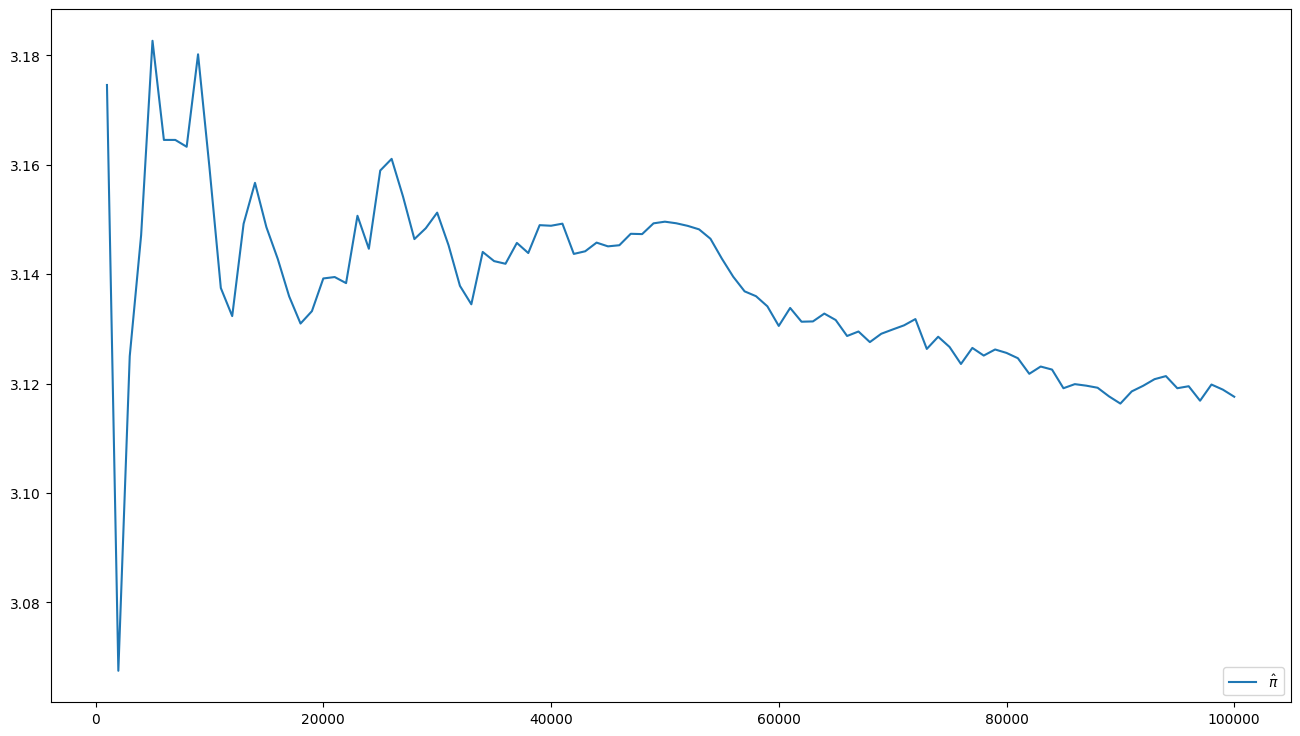

In [17]:
# | label: code:bNeedle
# | title: sht
#!/usr/bin/env python3

from myst_nb import glue
import math
import matplotlib.pyplot as plt
import numpy as np
import random

def I_Intersect(x, theta, l, d) :
    return 1.0 if x + l * math.cos(theta) > d else 0.0

n = 100000
d = 2.0
l = 1.0
pi_half = 0.5 * math.pi

sample = [I_Intersect(random.uniform(0, d), random.uniform(-pi_half, pi_half), l, d) for i in range(0, n)]

sArray = []
pArray = []
piArray = []

for i in range(1000, n+1, 1000) :
    p = np.average(sample[0:i])
    sArray.append(i)
    pArray.append(p)
    piArray.append((2*l)/(d*p))

fig, axis1 = plt.subplots(1, figsize=(16, 9))
# axis1.plot(sArray, pArray, label=r"$p$")
axis1.plot(sArray, piArray, label=r"$\hat\pi$")
axis1.legend(loc="lower right")

#print(f'Estimates:\n\tn: {n}\n\tp: {p:.6f}\n\tpi: {(2*l)/(d*p):.6f}')

# glue("bNeedle_p", p, display=False)
# glue("bNeedle_n", n, display=False)
# glue("bNeedle_fig", fig, display=False)


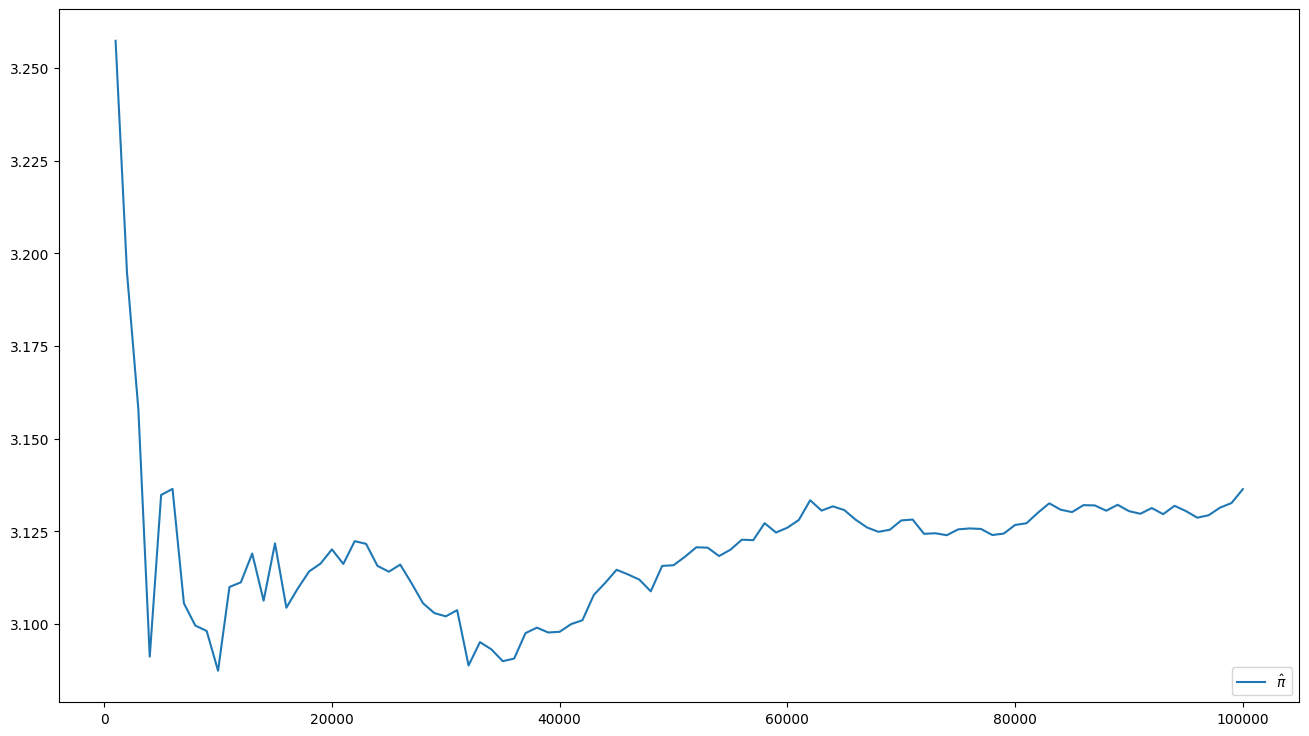

In [16]:
#| label: fig:bNeedlePi
fig